Add your import statements and the database connection statements in the below code block

In [1]:
#your code here
# cd /usr/lib/python3.12/site-packages/libpysal/examples/us_income
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import libpysal as ps
import pandas as pd

# Load the per capita income data correctly using libpysal examples
data_path = ps.examples.get_path("usjoin.csv")
per_cap_data = ps.io.open(data_path)

# Load the shapefile (geographic boundaries)
us_df = gpd.read_file(ps.examples.get_path("us48.shp"))

# Extract per capita income for the year 2009 and assign to the GeoDataFrame
us_df['per_cap'] = np.array(per_cap_data.by_col("2009"))

### **Question 1**:  
Using the Libpysal Data, create a choropleth path of the United States that depicts the per capita income of each US state in 2009.

**Note:** 
* The Libpysal and GeoPandas libraries both contain utility functions that may make this task easier.
* The choropleth map should have the following parameters:
    - legend
    - Title should be '**Per Capita Income of US States on Choropleth Map**'
    - xlabel should be '**US Income**'
* Do not set font size or font-weight for titles and labels and figure size for the plot.

/tmp/ipykernel_28/3678819469.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


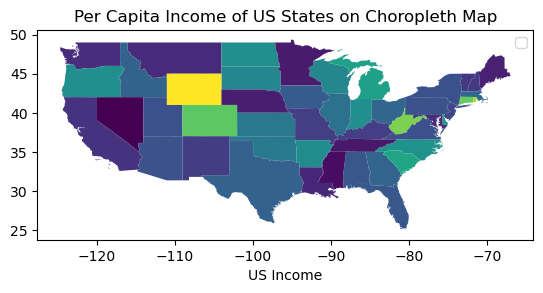

In [2]:
### TEST FUNCTION: test_question1
# DO NOT MODIFY OR REMOVE THE ABOVE LINE
# your code here
data_path = ps.examples.get_path("usjoin.csv")
per_cap_data = ps.io.open(data_path)
# Load the shapefile (geographic boundaries)
us_df = gpd.read_file(ps.examples.get_path("us48.shp"))

# Extract per capita income for the year 2009 and assign to the GeoDataFrame
us_df['per_cap'] = np.array(per_cap_data.by_col("2009"))
us_df.plot(column = "per_cap")

# Plotting
plt.title("Per Capita Income of US States on Choropleth Map")
plt.xlabel('US Income')
plt.legend()
plt.show()

### **Question 2**:
Again using the Libpysal Data, create a proportional symbol map showing a dot at the centroid of each state that is scaled to the per capita income of each US state in 2009.

**Note:** 
* The demonstration notebook for this unit contains code that performs a similar task and may be a useful reference for your assignment.
* The proportional symbol map should have the following parameters:
    * Title should be '**Proportional Symbol Map**'
    * xlabel should be '**US Income**'
* Do not set font size or font-weight for titles and labels and figure size for the plot.

/tmp/ipykernel_28/1184424927.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


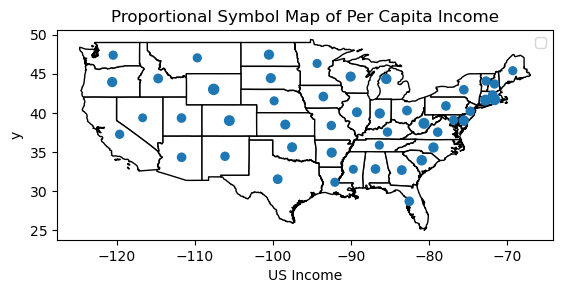

In [3]:
### TEST FUNCTION: test_question2
# DO NOT MODIFY OR REMOVE THE ABOVE 
# your code here
us_df['centroid_column'] = us_df.centroid
centroids = list(us_df['centroid_column'])
df = pd.DataFrame({'y':[centroids[i].y for i in range(len(centroids))], \
                   'x':[centroids[i].x for i in range(len(centroids))], \
                   'data':list(us_df['per_cap'])})
base = us_df.plot(color='white', edgecolor='black')
df.plot( kind='scatter', x='x', y='y', s=df['data']*0.001, ax=base)

# Plotting
plt.title("Proportional Symbol Map of Per Capita Income")
plt.xlabel('US Income')
plt.legend()
plt.show()

### **Question 3**:
Using the same data, compute the value of Moran's I for the per capita income of each US state in 2009 using Rook Continuity. Report the value of I rounded to 4 decimal places (i.e. x.XXXX)

**Note:** 
* You need to merge the two datasets and then apply
Rook Continuity
* Use the `esda` library to calculate the Moran's value.
* To calculate Moran’s I, you need two things: the value of interest (y) and a weight matrix (w).
* Print only the calculated Moran's value rounded to 4 in the code cell below.
* There should only be one print statement in the below cell.

In [4]:
### TEST FUNCTION: test_question3
# DO NOT MODIFY OR REMOVE THE ABOVE 
import geopandas as gpd
import esda

# Load per capita income dataset
data_path = ps.examples.get_path("usjoin.csv")
per_cap_data = pd.read_csv(data_path)  # Using Pandas to read CSV correctly
us_df = gpd.read_file(ps.examples.get_path("us48.shp"))
us_df = us_df.merge(per_cap_data[['Name', '2009']], left_on="STATE_NAME", right_on="Name")
us_df["per_cap"] = us_df["2009"].astype(float)

# Compute Rook contiguity spatial weights
w = ps.weights.Rook.from_dataframe(us_df, use_index=True)
w.transform = 'R'  # Normalize weights
# Extract per capita income values
y = us_df["per_cap"].values  # Ensure proper ordering
# Compute Moran's I using one-tailed test
mi = esda.Moran(y, w, two_tailed=False)

#Moran's I value
print(round(mi.I, 4))


0.4256
